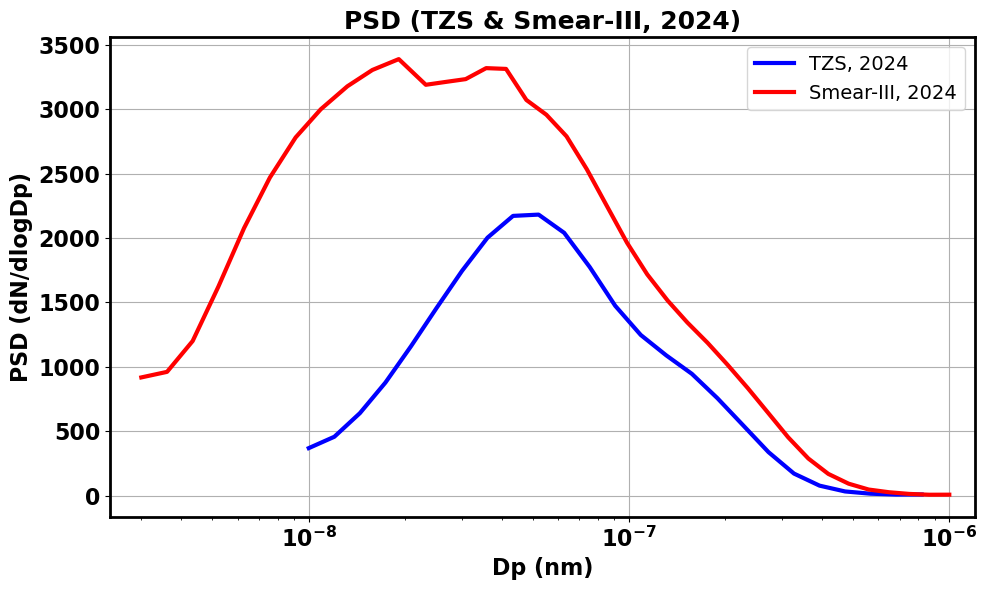

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file with both TZS and SMEAR sheets
file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG.xlsx'

# Load each sheet separately
tzs_data = pd.read_excel(file_path, sheet_name='TZS')
smear_data = pd.read_excel(file_path, sheet_name='SMEAR')

# Process TZS data
tzs_diameters = []
tzs_valid_columns = []
for col in tzs_data.columns[1:]:
    try:
        diameter = float(col)
        tzs_diameters.append(diameter)
        tzs_valid_columns.append(col)
    except ValueError:
        print(f"Skipping invalid column header: {col}")
tzs_sum_psd = tzs_data[tzs_valid_columns].mean()

# Process SMEAR data
smear_diameters = [float(d) for d in smear_data.columns[1:]]
smear_sum_psd = smear_data.iloc[:, 1:].mean()

# Set axis limits
y_min = -1_000_000
y_max = 30_000_000

# Create the combined plot
plt.figure(figsize=(10, 6))

# Plot TZS data
plt.semilogx(tzs_diameters, tzs_sum_psd, linewidth=3, color='blue', label="TZS, 2024")

# Plot SMEAR data
plt.semilogx(smear_diameters, smear_sum_psd, linewidth=3, color='red', label="Smear-III, 2024")

# Titles and labels
plt.title('PSD (TZS & Smear-III, 2024)', fontsize=18, weight='bold')
plt.xlabel('Dp (nm)', fontsize=16, weight='bold')
plt.ylabel('PSD (dN/dlogDp)', fontsize=16, weight='bold')

# Set axis limits
plt.xlim(min(min(tzs_diameters), min(smear_diameters)) * 0.8,
         max(max(tzs_diameters), max(smear_diameters)) * 1.2)
#plt.ylim(y_min, y_max)

# Adjust tick labels
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.gca().yaxis.get_offset_text().set_fontsize(16)
plt.gca().yaxis.get_offset_text().set_weight('bold')

# Set plot outline
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=14)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

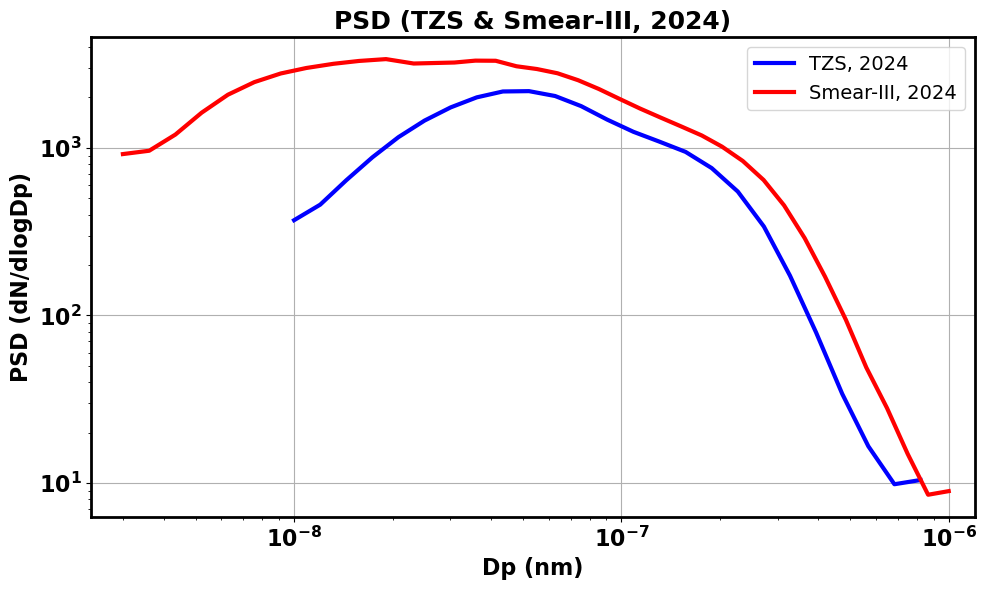

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file with both TZS and SMEAR sheets
file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG.xlsx'

# Load each sheet separately
tzs_data = pd.read_excel(file_path, sheet_name='TZS')
smear_data = pd.read_excel(file_path, sheet_name='SMEAR')

# Process TZS data
tzs_diameters = []
tzs_valid_columns = []
for col in tzs_data.columns[1:]:
    try:
        diameter = float(col)
        tzs_diameters.append(diameter)
        tzs_valid_columns.append(col)
    except ValueError:
        print(f"Skipping invalid column header: {col}")
tzs_sum_psd = tzs_data[tzs_valid_columns].mean()

# Process SMEAR data
smear_diameters = [float(d) for d in smear_data.columns[1:]]
smear_sum_psd = smear_data.iloc[:, 1:].mean()

# Set axis limits
y_min = -1_000_000
y_max = 30_000_000

# Create the combined plot
plt.figure(figsize=(10, 6))

# Plot TZS data
plt.loglog(tzs_diameters, tzs_sum_psd, linewidth=3, color='blue', label="TZS, 2024")

# Plot SMEAR data
plt.loglog(smear_diameters, smear_sum_psd, linewidth=3, color='red', label="Smear-III, 2024")

# Titles and labels
plt.title('PSD (TZS & Smear-III, 2024)', fontsize=18, weight='bold')
plt.xlabel('Dp (nm)', fontsize=16, weight='bold')
plt.ylabel('PSD (dN/dlogDp)', fontsize=16, weight='bold')

# Set axis limits
plt.xlim(min(min(tzs_diameters), min(smear_diameters)) * 0.8,
         max(max(tzs_diameters), max(smear_diameters)) * 1.2)
#plt.ylim(y_min, y_max)

# Adjust tick labels
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.gca().yaxis.get_offset_text().set_fontsize(16)
plt.gca().yaxis.get_offset_text().set_weight('bold')

# Set plot outline
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=14)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

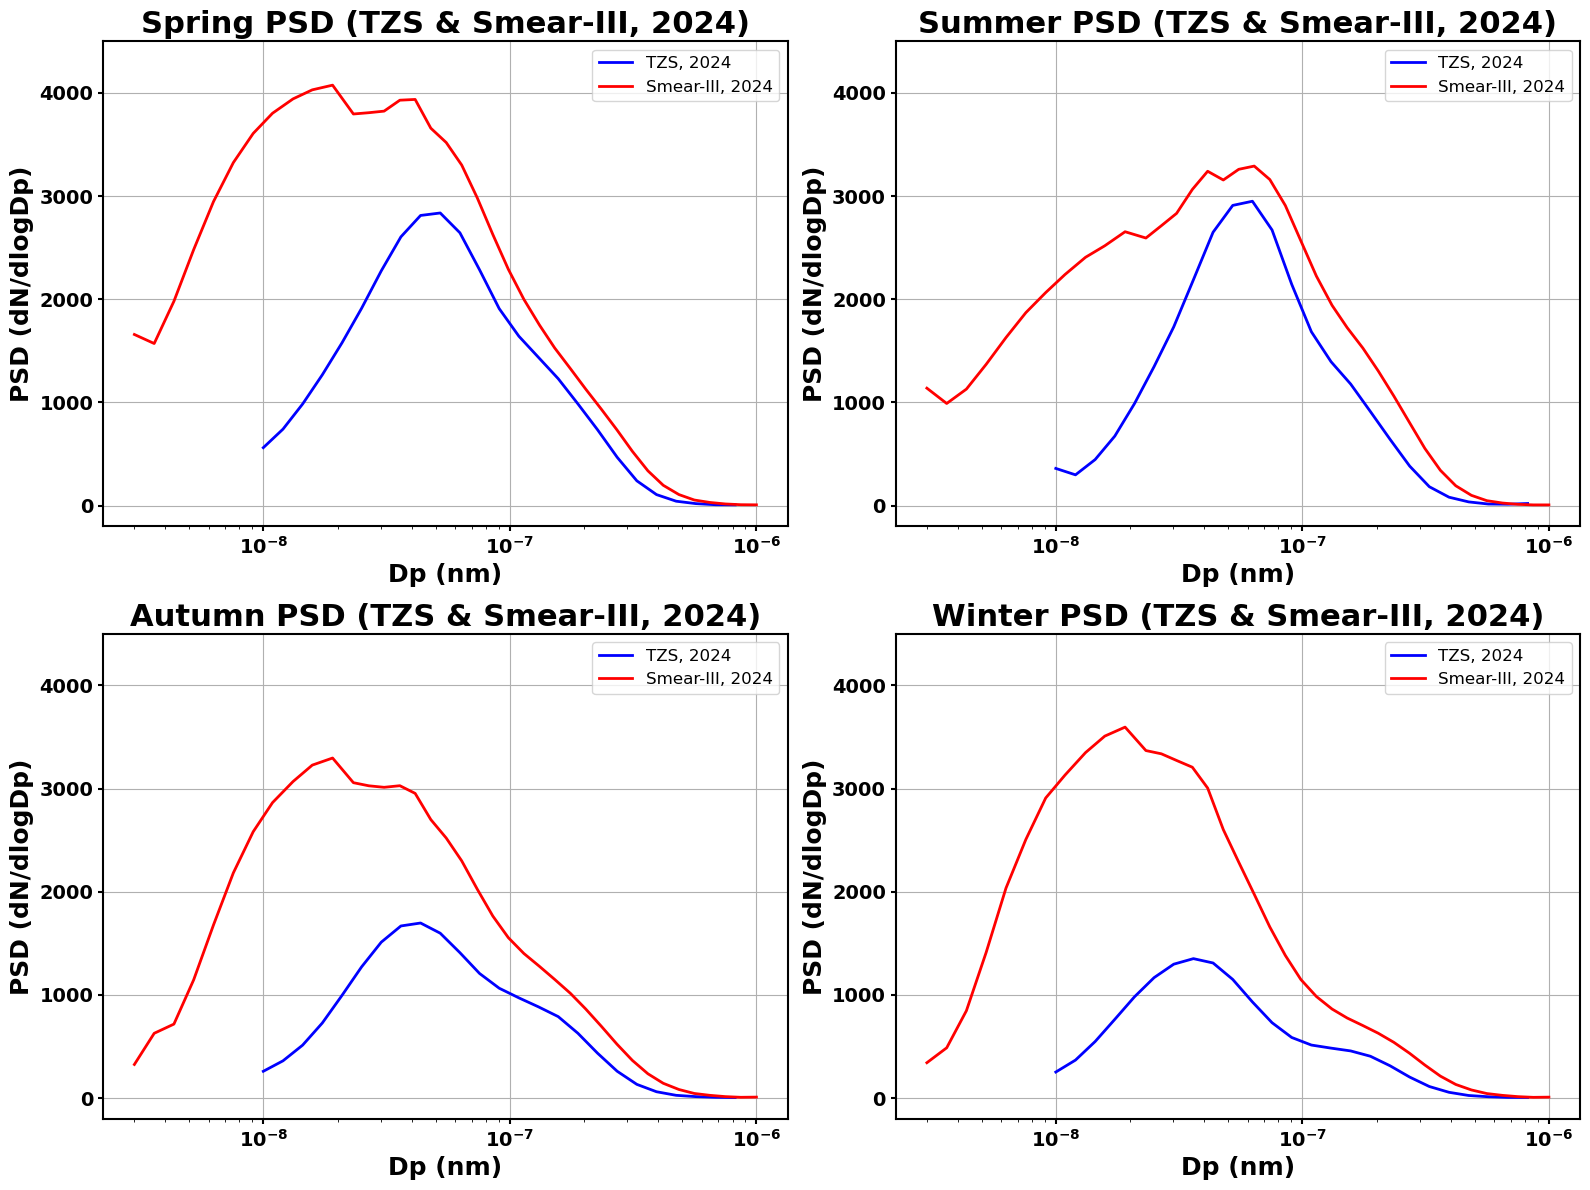

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file with both TZS and SMEAR sheets
file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG.xlsx'

# Load each sheet separately
tzs_data = pd.read_excel(file_path, sheet_name='TZS')
smear_data = pd.read_excel(file_path, sheet_name='SMEAR')

# Convert datetime columns to pandas datetime type
tzs_data['Date'] = pd.to_datetime(tzs_data['Date'])
smear_data['Date'] = pd.to_datetime(smear_data['Date'])

# Define seasonal boundaries (Finland)
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Add season column
tzs_data['Season'] = tzs_data['Date'].apply(get_season)
smear_data['Season'] = smear_data['Date'].apply(get_season)

# Group data by season
tzs_by_season = tzs_data.groupby('Season')
smear_by_season = smear_data.groupby('Season')

# Prepare seasonal average PSDs
seasonal_psd = {}
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    try:
        tzs_cols = [col for col in tzs_data.columns[1:-1] if col not in ['Season']]
        smear_cols = [col for col in smear_data.columns[1:-1] if col not in ['Season']]
        
        tzs_d = [float(d) for d in tzs_cols]
        smear_d = [float(d) for d in smear_cols]

        tzs_avg = tzs_by_season.get_group(season)[tzs_cols].mean()
        smear_avg = smear_by_season.get_group(season)[smear_cols].mean()

        seasonal_psd[season] = {
            'tzs_diameters': tzs_d,
            'tzs_psd': tzs_avg,
            'smear_diameters': smear_d,
            'smear_psd': smear_avg
        }
    except KeyError:
        pass  # Skip season if it's missing

# Set fixed y-axis range
y_min = -200
y_max = 4500

# Define the plotting order
ordered_seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, season in enumerate(ordered_seasons):
    if season in seasonal_psd:
        data = seasonal_psd[season]
        ax = axes[i]
        ax.semilogx(data['tzs_diameters'], data['tzs_psd'], linewidth=2, label='TZS, 2024', color='blue')
        ax.semilogx(data['smear_diameters'], data['smear_psd'], linewidth=2, label='Smear-III, 2024', color='red')
        ax.set_title(f'{season} PSD (TZS & Smear-III, 2024)', fontsize=22, weight='bold')
        ax.set_xlabel('Dp (nm)', fontsize=18, weight='bold')
        ax.set_ylabel('PSD (dN/dlogDp)', fontsize=18, weight='bold')
        ax.set_ylim(y_min, y_max)
        ax.grid(True)
        ax.legend(fontsize=12)
        ax.tick_params(axis='both', labelsize=14, width=1.5)
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

        for spine in ax.spines.values():
            spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

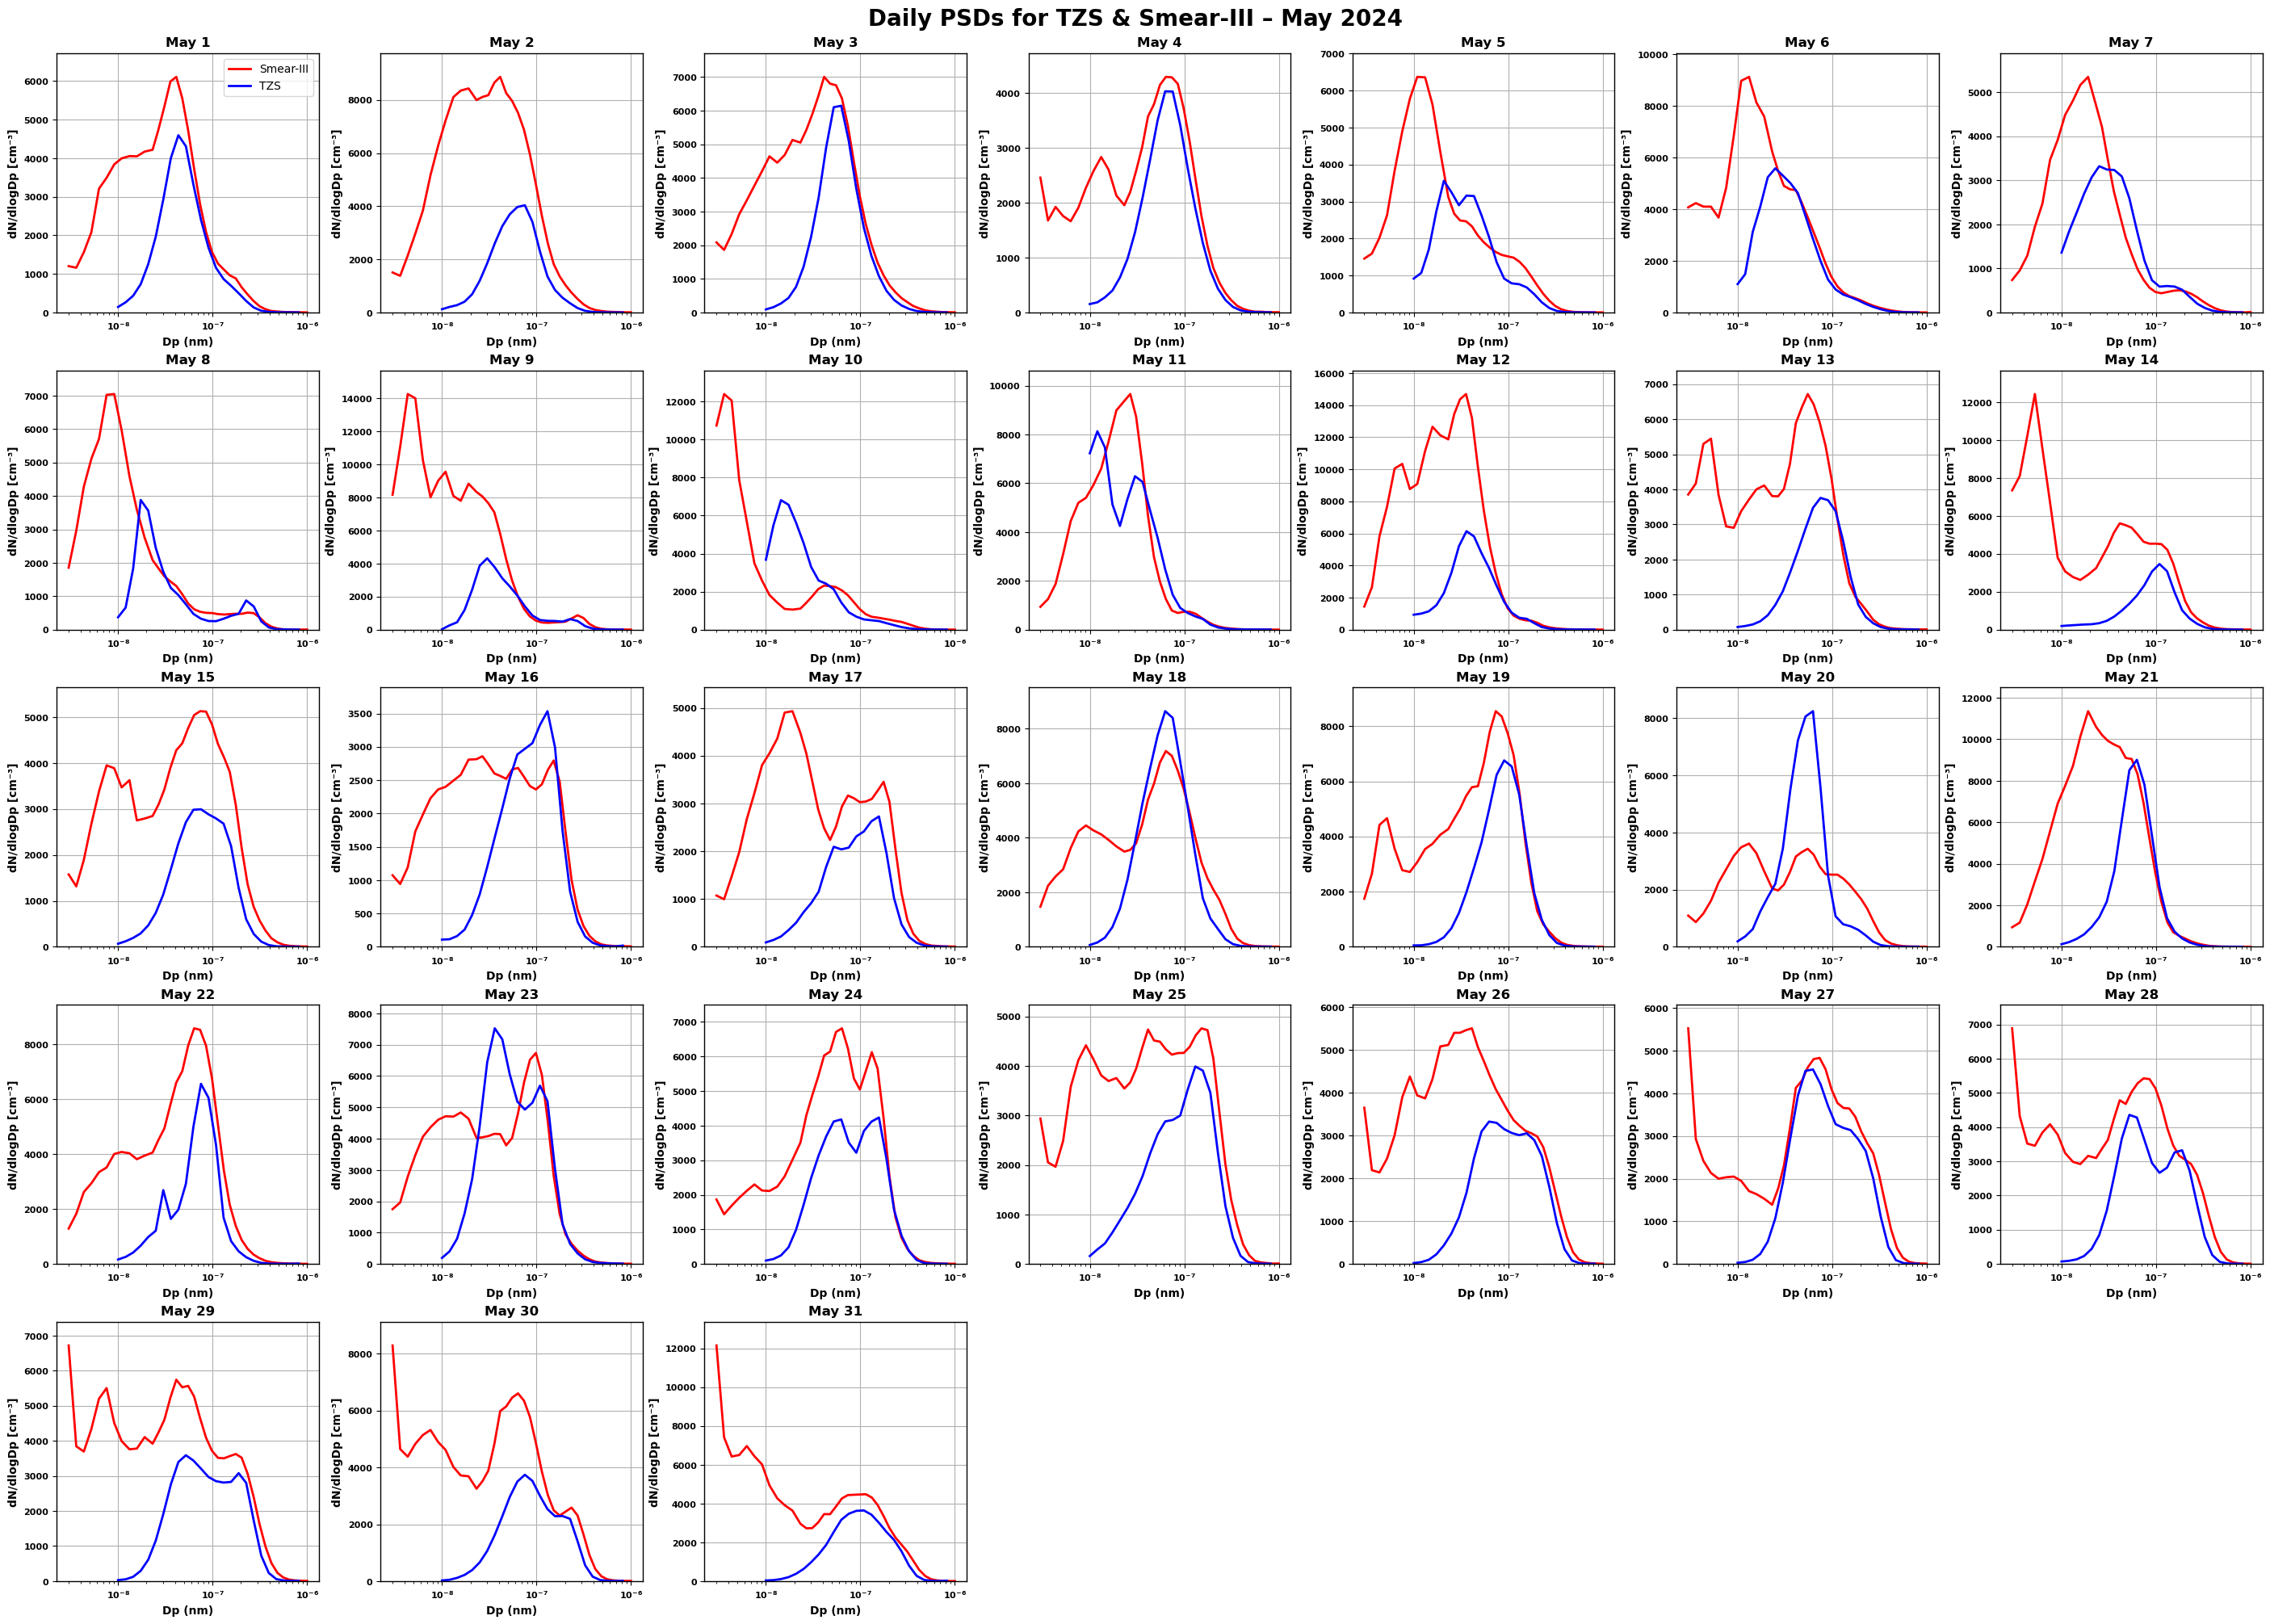

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the Excel File ===
file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG.xlsx'

# Load each sheet
tzs_data = pd.read_excel(file_path, sheet_name='TZS')
smear_data = pd.read_excel(file_path, sheet_name='SMEAR')

# Convert 'datetime' columns
tzs_data['Date'] = pd.to_datetime(tzs_data['Date'])
smear_data['Date'] = pd.to_datetime(smear_data['Date'])

# === Step 2: Filter for May 2024 ===
tzs_may = tzs_data[(tzs_data['Date'].dt.year == 2024) & (tzs_data['Date'].dt.month == 5)]
smear_may = smear_data[(smear_data['Date'].dt.year == 2024) & (smear_data['Date'].dt.month == 5)]

# === Step 3: Prepare diameter columns ===
# TZS
tzs_valid_columns = []
tzs_diameters = []
for col in tzs_may.columns[1:]:
    try:
        val = float(col)
        tzs_valid_columns.append(col)
        tzs_diameters.append(val)
    except ValueError:
        continue

# SMEAR
smear_cols = smear_may.columns[1:]
smear_diameters = [float(d) for d in smear_cols]

# === Step 4: Create Multi-Panel Plot ===
fig, axes = plt.subplots(5, 7, figsize=(28, 20), constrained_layout=True)
axes = axes.flatten()

may_dates = pd.date_range(start="2024-05-01", end="2024-05-31")

for i, date in enumerate(may_dates):
    ax = axes[i]

    # Filter data
    tzs_day = tzs_may[tzs_may['Date'].dt.date == date.date()]
    smear_day = smear_may[smear_may['Date'].dt.date == date.date()]

    tzs_avg = tzs_day[tzs_valid_columns].mean() if not tzs_day.empty else None
    smear_avg = smear_day[smear_cols].mean() if not smear_day.empty else None

    # Plot SMEAR
    if smear_avg is not None and not smear_avg.isna().all():
        ax.semilogx(smear_diameters, smear_avg, linewidth=2, label='Smear-III', color='red')

    # Plot TZS if available
    if tzs_avg is not None and not tzs_avg.isna().all():
        ax.semilogx(tzs_diameters, tzs_avg, linewidth=2, label='TZS', color='blue')

    # Formatting
    ax.set_title(f'May {date.day}', fontsize=12, weight='bold')
    ax.set_xlabel('Dp (nm)', fontsize=10, weight='bold')
    ax.set_ylabel('dN/dlogDp [cm⁻³]', fontsize=10, weight='bold')
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=8)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Safe y-limits
    max_val = 0
    if tzs_avg is not None and not tzs_avg.isna().all():
        max_val = max(max_val, tzs_avg.max(skipna=True))
    if smear_avg is not None and not smear_avg.isna().all():
        max_val = max(max_val, smear_avg.max(skipna=True))
    ax.set_ylim(0, max_val * 1.1 if pd.notna(max_val) and max_val > 0 else 1)

    for spine in ax.spines.values():
        spine.set_linewidth(1)

# Hide any unused subplots
for j in range(len(may_dates), len(axes)):
    fig.delaxes(axes[j])

# Add shared legend
axes[0].legend(fontsize=10)

# Super title
plt.suptitle('Daily PSDs for TZS & Smear-III – May 2024', fontsize=20, weight='bold')
plt.show()

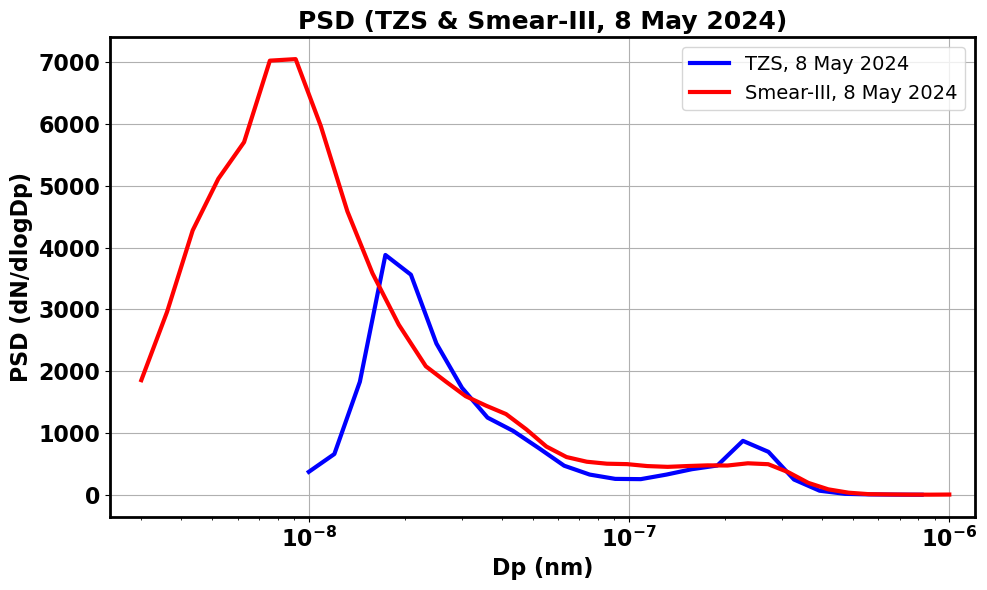

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file with both TZS and SMEAR sheets
file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG.xlsx'

# Load each sheet separately
tzs_data = pd.read_excel(file_path, sheet_name='TZS')
smear_data = pd.read_excel(file_path, sheet_name='SMEAR')

# Ensure datetime parsing
tzs_data['Date'] = pd.to_datetime(tzs_data['Date'])
smear_data['Date'] = pd.to_datetime(smear_data['Date'])

# Filter for 8th May 2024
tzs_data = tzs_data[tzs_data['Date'].dt.date == pd.to_datetime("2024-05-08").date()]
smear_data = smear_data[smear_data['Date'].dt.date == pd.to_datetime("2024-05-08").date()]

# Process TZS data
tzs_diameters = []
tzs_valid_columns = []
for col in tzs_data.columns[1:]:
    try:
        diameter = float(col)
        tzs_diameters.append(diameter)
        tzs_valid_columns.append(col)
    except ValueError:
        print(f"Skipping invalid column header: {col}")
tzs_sum_psd = tzs_data[tzs_valid_columns].mean()

# Process SMEAR data
smear_diameters = [float(d) for d in smear_data.columns[1:]]
smear_sum_psd = smear_data.iloc[:, 1:].mean()

# Create the combined plot
plt.figure(figsize=(10, 6))

# Plot TZS data
plt.semilogx(tzs_diameters, tzs_sum_psd, linewidth=3, color='blue', label="TZS, 8 May 2024")

# Plot SMEAR data
plt.semilogx(smear_diameters, smear_sum_psd, linewidth=3, color='red', label="Smear-III, 8 May 2024")

# Titles and labels
plt.title('PSD (TZS & Smear-III, 8 May 2024)', fontsize=18, weight='bold')
plt.xlabel('Dp (nm)', fontsize=16, weight='bold')
plt.ylabel('PSD (dN/dlogDp)', fontsize=16, weight='bold')

# Set axis limits
plt.xlim(min(min(tzs_diameters), min(smear_diameters)) * 0.8,
         max(max(tzs_diameters), max(smear_diameters)) * 1.2)

# Adjust tick labels
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.gca().yaxis.get_offset_text().set_fontsize(16)
plt.gca().yaxis.get_offset_text().set_weight('bold')

# Set plot outline
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=14)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

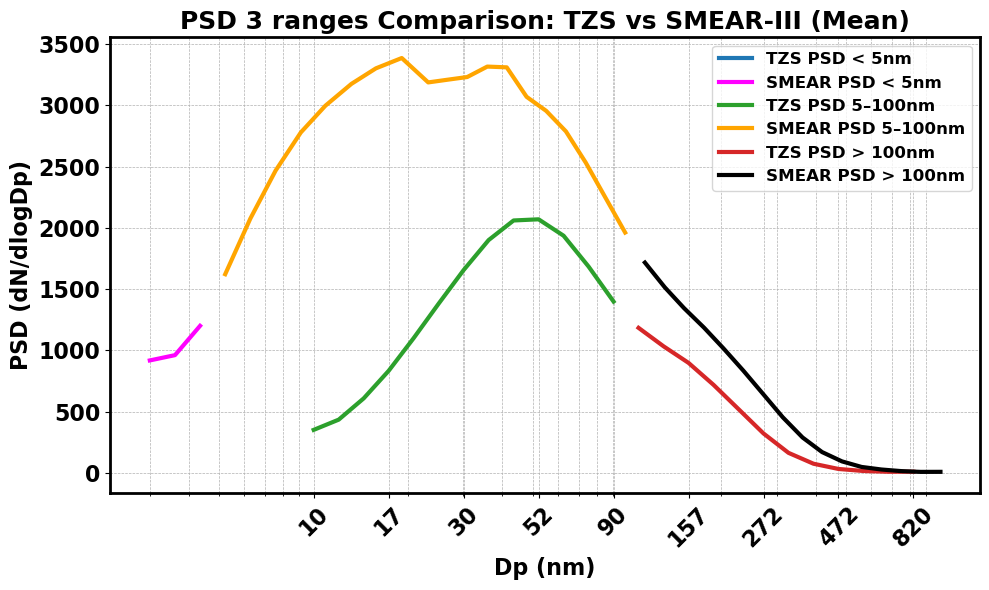

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG.xlsx'
combined_data = pd.read_excel(file_path, sheet_name=None)

# Extract data from sheets
tzs_data = combined_data['TZS']
smear_data = combined_data['SMEAR']

# Function to process PSD data (now using mean)
def process_psd_data(df):
    df = df.fillna(0)
    diameters_m = np.array([float(col) for col in df.columns[1:]])
    diameters_nm = diameters_m * 1e9
    psd_matrix = df.iloc[:, 1:].values
    psd_mean = psd_matrix.mean(axis=0)  # Changed from sum to mean
    return diameters_nm, psd_mean

# Process data for both sites
diam_tzs, psd_tzs = process_psd_data(tzs_data)
diam_smear, psd_smear = process_psd_data(smear_data)

# Function to get diameter group indices
def get_groups(diameters_nm):
    return (
        np.where(diameters_nm < 5)[0],
        np.where((diameters_nm >= 5) & (diameters_nm <= 100))[0],
        np.where(diameters_nm > 100)[0]
    )

# Get groups for both datasets
tzs_groups = get_groups(diam_tzs)
smear_groups = get_groups(diam_smear)

# Define visually distinct colors
colors_tzs = ['#1f77b4', '#2ca02c', '#d62728']    # Blue, Green, Red for TZS
colors_smear = ['#ff00ff', '#ffa500', '#000000']  # Magenta, Orange, Black for SMEAR

# Plot
plt.figure(figsize=(10, 6))
group_labels = ['< 5nm', '5–100nm', '> 100nm']

for i, (tzs_idx, smear_idx, label) in enumerate(zip(tzs_groups, smear_groups, group_labels)):
    plt.plot(diam_tzs[tzs_idx], psd_tzs[tzs_idx],
             label=f'TZS PSD {label}', color=colors_tzs[i], linewidth=3)
    plt.plot(diam_smear[smear_idx], psd_smear[smear_idx],
             label=f'SMEAR PSD {label}', color=colors_smear[i], linewidth=3)

# Axes formatting
plt.xscale('log')
plt.xlabel('Dp (nm)', fontsize=16, weight='bold')
plt.ylabel('PSD (dN/dlogDp)', fontsize=16, weight='bold')
plt.title('PSD 3 ranges Comparison: TZS vs SMEAR-III (Mean)', fontsize=18, weight='bold')

# Tick styling
plt.xticks(diam_tzs[::3], [f'{int(d)}' for d in diam_tzs[::3]],
           fontsize=16, fontweight='bold', rotation=45)
plt.yticks(fontsize=16, fontweight='bold')

# Format scientific notation label on Y-axis
plt.gca().yaxis.get_offset_text().set_fontsize(16)
plt.gca().yaxis.get_offset_text().set_weight('bold')

# Thicken plot outline
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
legend = plt.legend(fontsize=12)
for text in legend.get_texts():
    text.set_weight('bold')

plt.tight_layout()
plt.show()

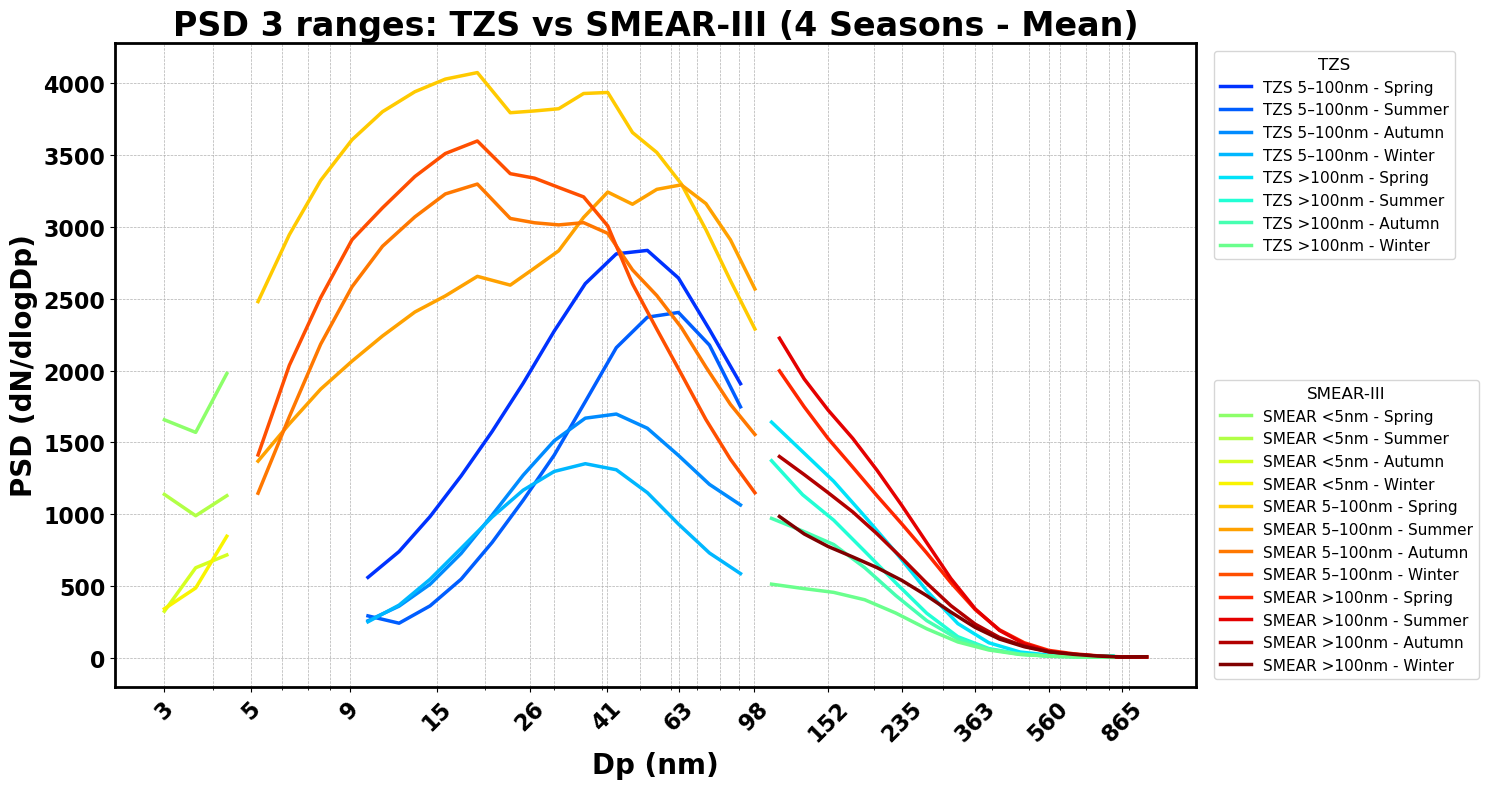

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import to_hex

# Load Excel file
file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG.xlsx'
combined_data = pd.read_excel(file_path, sheet_name=None)

# Separate data
tzs_data = combined_data['TZS']
smear_data = combined_data['SMEAR']

# Define seasons
seasons = {
    'Spring': (3, 4, 5),
    'Summer': (6, 7, 8),
    'Autumn': (9, 10, 11),
    'Winter': (12, 1, 2)
}

# Function to process and group seasonal PSD values using mean
def seasonal_grouped_psd(df):
    df = df.fillna(0)
    df['Month'] = pd.to_datetime(df.iloc[:, 0]).dt.month
    diameters_m = np.array([float(col) for col in df.columns[1:-1]])  # Exclude datetime and 'Month'
    diameters_nm = diameters_m * 1e9
    grouped_seasonal_results = {}

    for season, months in seasons.items():
        season_df = df[df['Month'].isin(months)].iloc[:, 1:-1]
        psd_matrix = season_df.values
        grouped_seasonal_results[season] = psd_matrix

    return diameters_nm, grouped_seasonal_results

# Process both datasets
diam_tzs, seasonal_tzs = seasonal_grouped_psd(tzs_data)
diam_smear, seasonal_smear = seasonal_grouped_psd(smear_data)

# Generate 24 unique Jet colors
cmap_jet = cm.get_cmap('jet', 24)
jet_colors_24 = [to_hex(cmap_jet(i)) for i in range(24)]

# Define ranges and order
size_ranges = ['<5nm', '5–100nm', '>100nm']
seasons_order = list(seasons.keys())

# Plot setup
plt.figure(figsize=(15, 8))
tzs_handles = []
smear_handles = []
line_count = 0

# Plot logic
for i, size_range in enumerate(size_ranges):
    for j, season in enumerate(seasons_order):
        color_tzs = jet_colors_24[line_count]
        color_smear = jet_colors_24[line_count + 12]

        # Select indices separately for TZS and SMEAR
        if size_range == '<5nm':
            idx_tzs = np.where(diam_tzs < 5)[0]
            idx_smear = np.where(diam_smear < 5)[0]
        elif size_range == '5–100nm':
            idx_tzs = np.where((diam_tzs >= 5) & (diam_tzs <= 100))[0]
            idx_smear = np.where((diam_smear >= 5) & (diam_smear <= 100))[0]
        else:  # '>100nm'
            idx_tzs = np.where(diam_tzs > 100)[0]
            idx_smear = np.where(diam_smear > 100)[0]

        # Plot only if data exists
        if len(idx_tzs) > 0:
            tzs_line, = plt.plot(diam_tzs[idx_tzs],
                                 seasonal_tzs[season][:, idx_tzs].mean(axis=0),  # changed from sum to mean
                                 label=f'TZS {size_range} - {season}',
                                 color=color_tzs, linewidth=2.5)
            tzs_handles.append(tzs_line)

        if len(idx_smear) > 0:
            smear_line, = plt.plot(diam_smear[idx_smear],
                                   seasonal_smear[season][:, idx_smear].mean(axis=0),  # changed from sum to mean
                                   label=f'SMEAR {size_range} - {season}',
                                   color=color_smear, linewidth=2.5)
            smear_handles.append(smear_line)

        line_count += 1

# Custom X-ticks like your image
custom_xticks = [3, 5, 9, 15, 26, 41, 63, 98, 152, 235, 363, 560, 865]
plt.xscale('log')
plt.xticks(custom_xticks, [str(x) for x in custom_xticks], fontsize=16, fontweight='bold', rotation=45)

# Labels and title
plt.xlabel('Dp (nm)', fontsize=20, weight='bold')
plt.ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
plt.title('PSD 3 ranges: TZS vs SMEAR-III (4 Seasons - Mean)', fontsize=24, weight='bold')

# Y-ticks and offsets
plt.yticks(fontsize=16, fontweight='bold')
plt.gca().yaxis.get_offset_text().set_fontsize(16)
plt.gca().yaxis.get_offset_text().set_weight('bold')

# Thicker border
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legends
legend1 = plt.legend(handles=tzs_handles, title='TZS', fontsize=11, title_fontsize=12,
                     loc='upper left', bbox_to_anchor=(1.01, 1))
legend2 = plt.legend(handles=smear_handles, title='SMEAR-III', fontsize=11, title_fontsize=12,
                     loc='lower left', bbox_to_anchor=(1.01, 0))
plt.gca().add_artist(legend1)

# Removed fixed Y-axis limits — now autoscaling
# plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

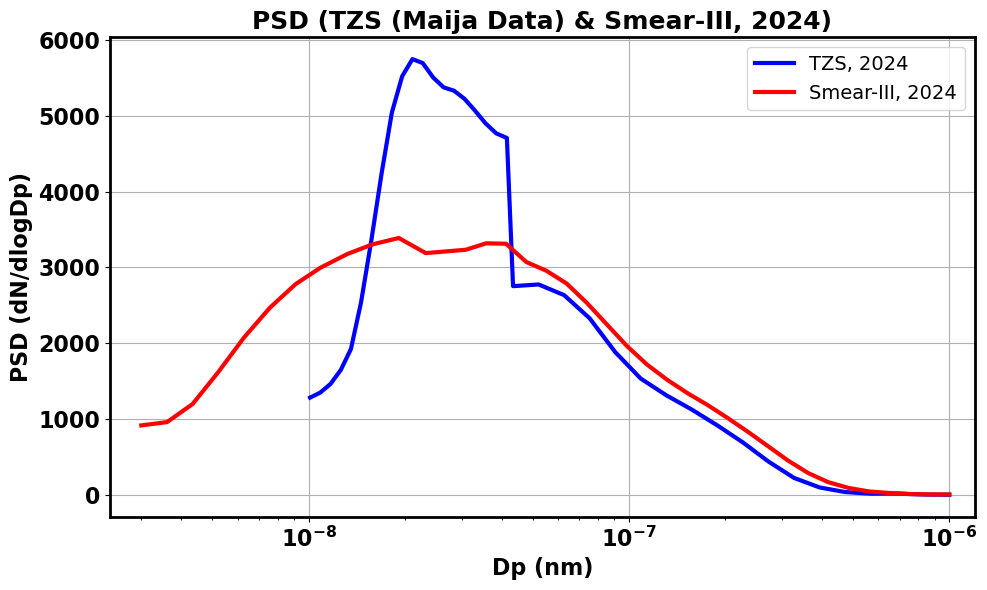

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file with both TZS and SMEAR sheets
file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG (Maija Data).xlsx'

# Load each sheet separately
tzs_data = pd.read_excel(file_path, sheet_name='TZS')
smear_data = pd.read_excel(file_path, sheet_name='SMEAR')

# Process TZS data
tzs_diameters = []
tzs_valid_columns = []
for col in tzs_data.columns[1:]:
    try:
        diameter = float(col)
        tzs_diameters.append(diameter)
        tzs_valid_columns.append(col)
    except ValueError:
        print(f"Skipping invalid column header: {col}")
tzs_sum_psd = tzs_data[tzs_valid_columns].mean()

# Process SMEAR data
smear_diameters = [float(d) for d in smear_data.columns[1:]]
smear_sum_psd = smear_data.iloc[:, 1:].mean()

# Set axis limits
y_min = -1_000_000
y_max = 30_000_000

# Create the combined plot
plt.figure(figsize=(10, 6))

# Plot TZS data
plt.semilogx(tzs_diameters, tzs_sum_psd, linewidth=3, color='blue', label="TZS, 2024")

# Plot SMEAR data
plt.semilogx(smear_diameters, smear_sum_psd, linewidth=3, color='red', label="Smear-III, 2024")

# Titles and labels
plt.title('PSD (TZS (Maija Data) & Smear-III, 2024)', fontsize=18, weight='bold')
plt.xlabel('Dp (nm)', fontsize=16, weight='bold')
plt.ylabel('PSD (dN/dlogDp)', fontsize=16, weight='bold')

# Set axis limits
plt.xlim(min(min(tzs_diameters), min(smear_diameters)) * 0.8,
         max(max(tzs_diameters), max(smear_diameters)) * 1.2)
#plt.ylim(y_min, y_max)

# Adjust tick labels
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.gca().yaxis.get_offset_text().set_fontsize(16)
plt.gca().yaxis.get_offset_text().set_weight('bold')

# Set plot outline
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=14)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

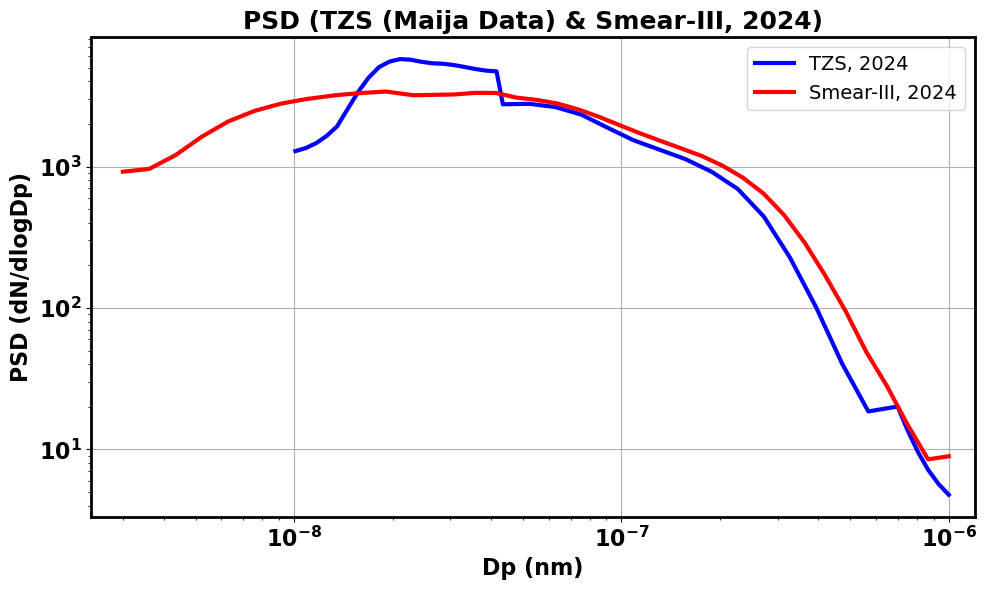

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file with both TZS and SMEAR sheets
file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG (Maija Data).xlsx'

# Load each sheet separately
tzs_data = pd.read_excel(file_path, sheet_name='TZS')
smear_data = pd.read_excel(file_path, sheet_name='SMEAR')

# Process TZS data
tzs_diameters = []
tzs_valid_columns = []
for col in tzs_data.columns[1:]:
    try:
        diameter = float(col)
        tzs_diameters.append(diameter)
        tzs_valid_columns.append(col)
    except ValueError:
        print(f"Skipping invalid column header: {col}")
tzs_sum_psd = tzs_data[tzs_valid_columns].mean()

# Process SMEAR data
smear_diameters = [float(d) for d in smear_data.columns[1:]]
smear_sum_psd = smear_data.iloc[:, 1:].mean()

# Set axis limits
y_min = -1_000_000
y_max = 30_000_000

# Create the combined plot
plt.figure(figsize=(10, 6))

# Plot TZS data
plt.loglog(tzs_diameters, tzs_sum_psd, linewidth=3, color='blue', label="TZS, 2024")

# Plot SMEAR data
plt.loglog(smear_diameters, smear_sum_psd, linewidth=3, color='red', label="Smear-III, 2024")

# Titles and labels
plt.title('PSD (TZS (Maija Data) & Smear-III, 2024)', fontsize=18, weight='bold')
plt.xlabel('Dp (nm)', fontsize=16, weight='bold')
plt.ylabel('PSD (dN/dlogDp)', fontsize=16, weight='bold')

# Set axis limits
plt.xlim(min(min(tzs_diameters), min(smear_diameters)) * 0.8,
         max(max(tzs_diameters), max(smear_diameters)) * 1.2)
#plt.ylim(y_min, y_max)

# Adjust tick labels
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.gca().yaxis.get_offset_text().set_fontsize(16)
plt.gca().yaxis.get_offset_text().set_weight('bold')

# Set plot outline
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=14)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

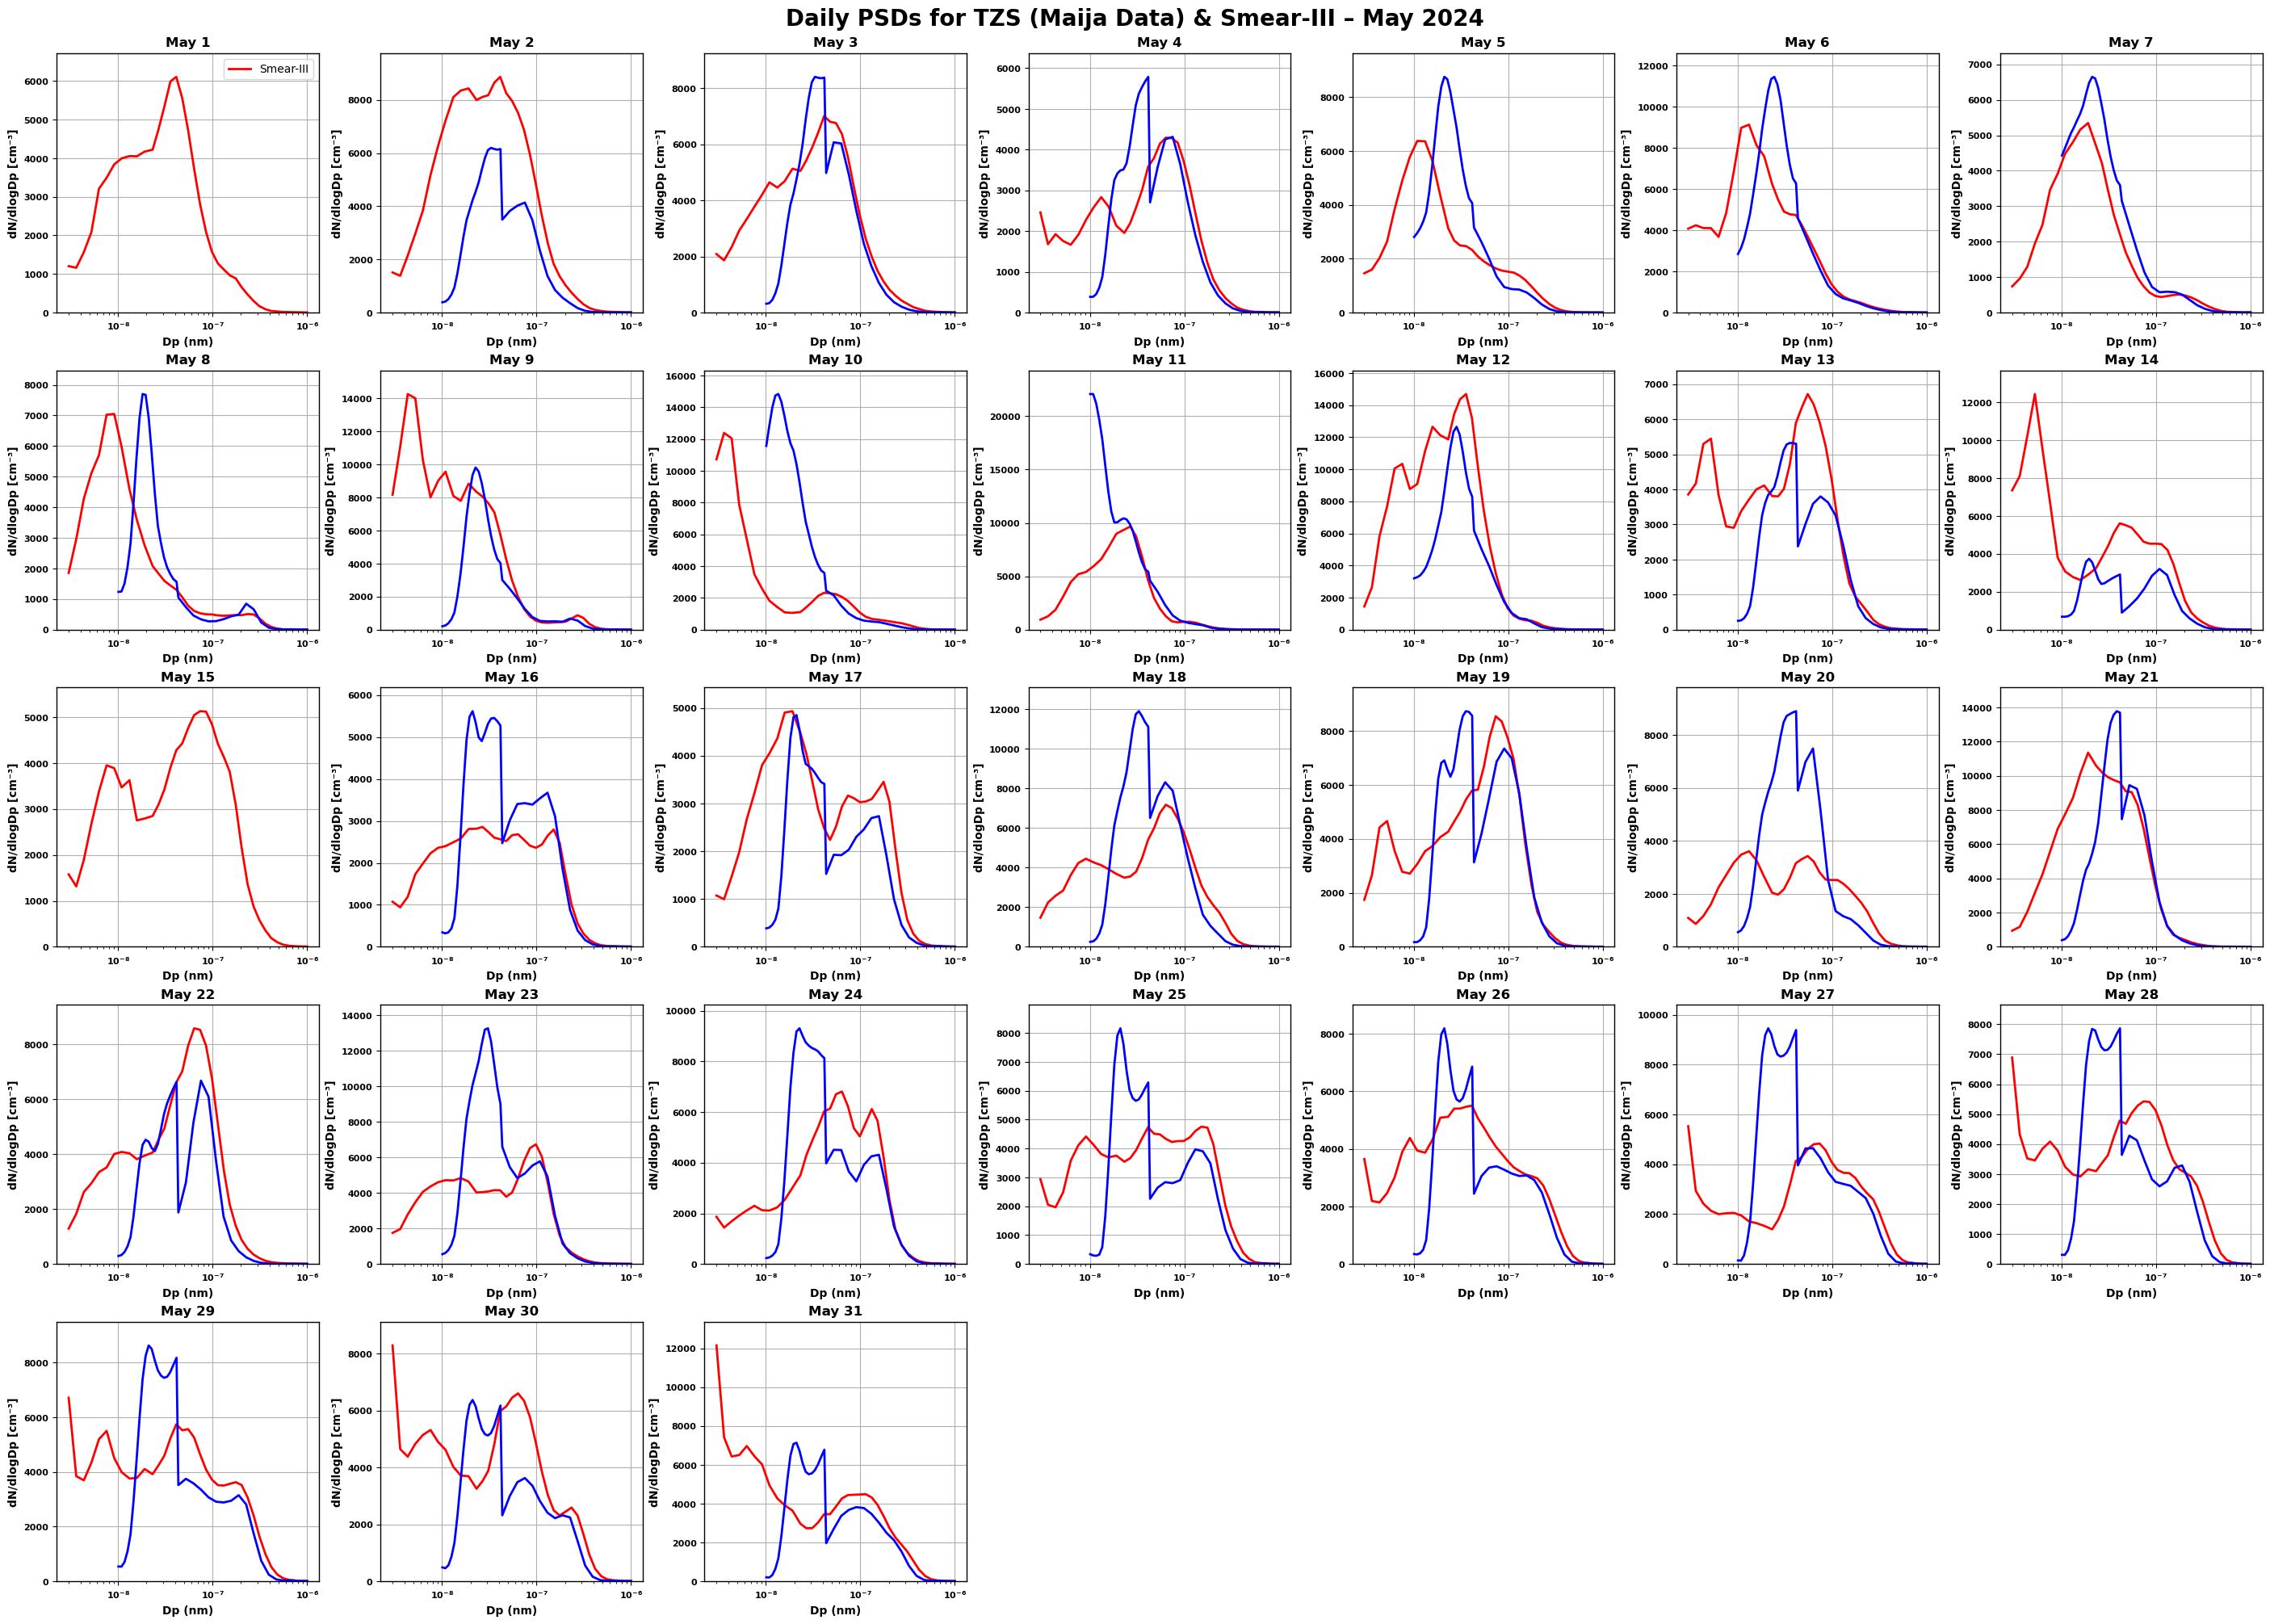

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the Excel File ===
file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG (Maija Data).xlsx'

# Load each sheet
tzs_data = pd.read_excel(file_path, sheet_name='TZS')
smear_data = pd.read_excel(file_path, sheet_name='SMEAR')

# Convert 'datetime' columns
tzs_data['Date'] = pd.to_datetime(tzs_data['Date'])
smear_data['Date'] = pd.to_datetime(smear_data['Date'])

# === Step 2: Filter for May 2024 ===
tzs_may = tzs_data[(tzs_data['Date'].dt.year == 2024) & (tzs_data['Date'].dt.month == 5)]
smear_may = smear_data[(smear_data['Date'].dt.year == 2024) & (smear_data['Date'].dt.month == 5)]

# === Step 3: Prepare diameter columns ===
# TZS
tzs_valid_columns = []
tzs_diameters = []
for col in tzs_may.columns[1:]:
    try:
        val = float(col)
        tzs_valid_columns.append(col)
        tzs_diameters.append(val)
    except ValueError:
        continue

# SMEAR
smear_cols = smear_may.columns[1:]
smear_diameters = [float(d) for d in smear_cols]

# === Step 4: Create Multi-Panel Plot ===
fig, axes = plt.subplots(5, 7, figsize=(28, 20), constrained_layout=True)
axes = axes.flatten()

may_dates = pd.date_range(start="2024-05-01", end="2024-05-31")

for i, date in enumerate(may_dates):
    ax = axes[i]

    # Filter data
    tzs_day = tzs_may[tzs_may['Date'].dt.date == date.date()]
    smear_day = smear_may[smear_may['Date'].dt.date == date.date()]

    tzs_avg = tzs_day[tzs_valid_columns].mean() if not tzs_day.empty else None
    smear_avg = smear_day[smear_cols].mean() if not smear_day.empty else None

    # Plot SMEAR
    if smear_avg is not None and not smear_avg.isna().all():
        ax.semilogx(smear_diameters, smear_avg, linewidth=2, label='Smear-III', color='red')

    # Plot TZS if available
    if tzs_avg is not None and not tzs_avg.isna().all():
        ax.semilogx(tzs_diameters, tzs_avg, linewidth=2, label='TZS', color='blue')

    # Formatting
    ax.set_title(f'May {date.day}', fontsize=12, weight='bold')
    ax.set_xlabel('Dp (nm)', fontsize=10, weight='bold')
    ax.set_ylabel('dN/dlogDp [cm⁻³]', fontsize=10, weight='bold')
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=8)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Safe y-limits
    max_val = 0
    if tzs_avg is not None and not tzs_avg.isna().all():
        max_val = max(max_val, tzs_avg.max(skipna=True))
    if smear_avg is not None and not smear_avg.isna().all():
        max_val = max(max_val, smear_avg.max(skipna=True))
    ax.set_ylim(0, max_val * 1.1 if pd.notna(max_val) and max_val > 0 else 1)

    for spine in ax.spines.values():
        spine.set_linewidth(1)

# Hide any unused subplots
for j in range(len(may_dates), len(axes)):
    fig.delaxes(axes[j])

# Add shared legend
axes[0].legend(fontsize=10)

# Super title
plt.suptitle('Daily PSDs for TZS (Maija Data) & Smear-III – May 2024', fontsize=20, weight='bold')
plt.show()

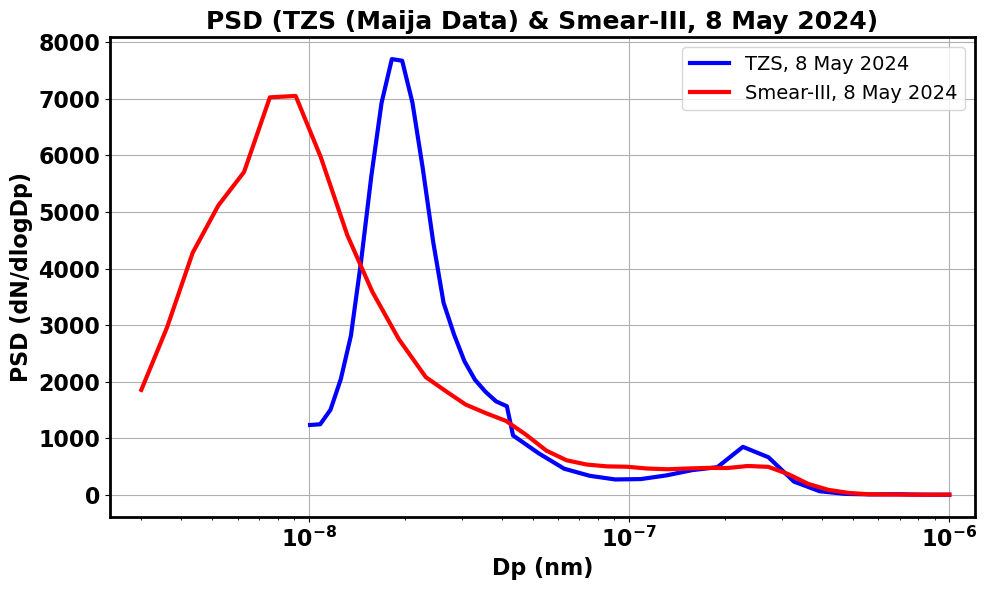

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file with both TZS and SMEAR sheets
file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG (Maija Data).xlsx'

# Load each sheet separately
tzs_data = pd.read_excel(file_path, sheet_name='TZS')
smear_data = pd.read_excel(file_path, sheet_name='SMEAR')

# Ensure datetime parsing
tzs_data['Date'] = pd.to_datetime(tzs_data['Date'])
smear_data['Date'] = pd.to_datetime(smear_data['Date'])

# Filter for 8th May 2024
tzs_data = tzs_data[tzs_data['Date'].dt.date == pd.to_datetime("2024-05-08").date()]
smear_data = smear_data[smear_data['Date'].dt.date == pd.to_datetime("2024-05-08").date()]

# Process TZS data
tzs_diameters = []
tzs_valid_columns = []
for col in tzs_data.columns[1:]:
    try:
        diameter = float(col)
        tzs_diameters.append(diameter)
        tzs_valid_columns.append(col)
    except ValueError:
        print(f"Skipping invalid column header: {col}")
tzs_sum_psd = tzs_data[tzs_valid_columns].mean()

# Process SMEAR data
smear_diameters = [float(d) for d in smear_data.columns[1:]]
smear_sum_psd = smear_data.iloc[:, 1:].mean()

# Create the combined plot
plt.figure(figsize=(10, 6))

# Plot TZS data
plt.semilogx(tzs_diameters, tzs_sum_psd, linewidth=3, color='blue', label="TZS, 8 May 2024")

# Plot SMEAR data
plt.semilogx(smear_diameters, smear_sum_psd, linewidth=3, color='red', label="Smear-III, 8 May 2024")

# Titles and labels
plt.title('PSD (TZS (Maija Data) & Smear-III, 8 May 2024)', fontsize=18, weight='bold')
plt.xlabel('Dp (nm)', fontsize=16, weight='bold')
plt.ylabel('PSD (dN/dlogDp)', fontsize=16, weight='bold')

# Set axis limits
plt.xlim(min(min(tzs_diameters), min(smear_diameters)) * 0.8,
         max(max(tzs_diameters), max(smear_diameters)) * 1.2)

# Adjust tick labels
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.gca().yaxis.get_offset_text().set_fontsize(16)
plt.gca().yaxis.get_offset_text().set_weight('bold')

# Set plot outline
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=14)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

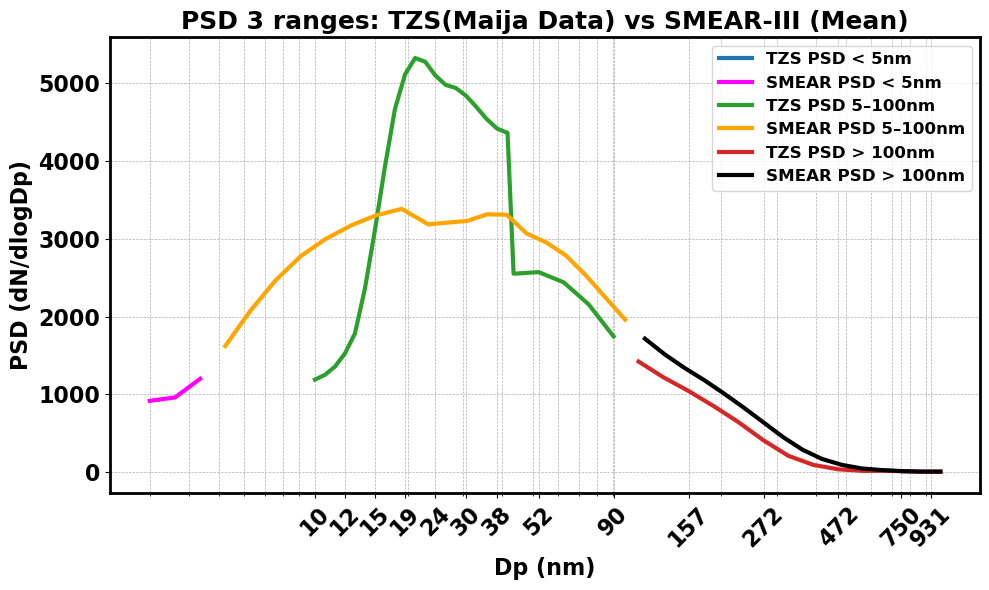

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG (Maija Data).xlsx'
combined_data = pd.read_excel(file_path, sheet_name=None)

# Extract data from sheets
tzs_data = combined_data['TZS']
smear_data = combined_data['SMEAR']

# Function to process PSD data (now using mean)
def process_psd_data(df):
    df = df.fillna(0)
    diameters_m = np.array([float(col) for col in df.columns[1:]])
    diameters_nm = diameters_m * 1e9
    psd_matrix = df.iloc[:, 1:].values
    psd_mean = psd_matrix.mean(axis=0)  # Changed from sum to mean
    return diameters_nm, psd_mean

# Process data for both sites
diam_tzs, psd_tzs = process_psd_data(tzs_data)
diam_smear, psd_smear = process_psd_data(smear_data)

# Function to get diameter group indices
def get_groups(diameters_nm):
    return (
        np.where(diameters_nm < 5)[0],
        np.where((diameters_nm >= 5) & (diameters_nm <= 100))[0],
        np.where(diameters_nm > 100)[0]
    )

# Get groups for both datasets
tzs_groups = get_groups(diam_tzs)
smear_groups = get_groups(diam_smear)

# Define visually distinct colors
colors_tzs = ['#1f77b4', '#2ca02c', '#d62728']    # Blue, Green, Red for TZS
colors_smear = ['#ff00ff', '#ffa500', '#000000']  # Magenta, Orange, Black for SMEAR

# Plot
plt.figure(figsize=(10, 6))
group_labels = ['< 5nm', '5–100nm', '> 100nm']

for i, (tzs_idx, smear_idx, label) in enumerate(zip(tzs_groups, smear_groups, group_labels)):
    plt.plot(diam_tzs[tzs_idx], psd_tzs[tzs_idx],
             label=f'TZS PSD {label}', color=colors_tzs[i], linewidth=3)
    plt.plot(diam_smear[smear_idx], psd_smear[smear_idx],
             label=f'SMEAR PSD {label}', color=colors_smear[i], linewidth=3)

# Axes formatting
plt.xscale('log')
plt.xlabel('Dp (nm)', fontsize=16, weight='bold')
plt.ylabel('PSD (dN/dlogDp)', fontsize=16, weight='bold')
plt.title('PSD 3 ranges: TZS(Maija Data) vs SMEAR-III (Mean)', fontsize=18, weight='bold')

# Tick styling
plt.xticks(diam_tzs[::3], [f'{int(d)}' for d in diam_tzs[::3]],
           fontsize=16, fontweight='bold', rotation=45)
plt.yticks(fontsize=16, fontweight='bold')

# Format scientific notation label on Y-axis
plt.gca().yaxis.get_offset_text().set_fontsize(16)
plt.gca().yaxis.get_offset_text().set_weight('bold')

# Thicken plot outline
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
legend = plt.legend(fontsize=12)
for text in legend.get_texts():
    text.set_weight('bold')

plt.tight_layout()
plt.show()

/var/folders/4t/47wt24490m52zgk23b06kc9m0000gn/T/ipykernel_26966/2026242587.py:76: RuntimeWarning: Mean of empty slice.
  seasonal_tzs[season][:, idx_tzs].mean(axis=0),  # changed from sum to mean
/Users/touqeergill/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


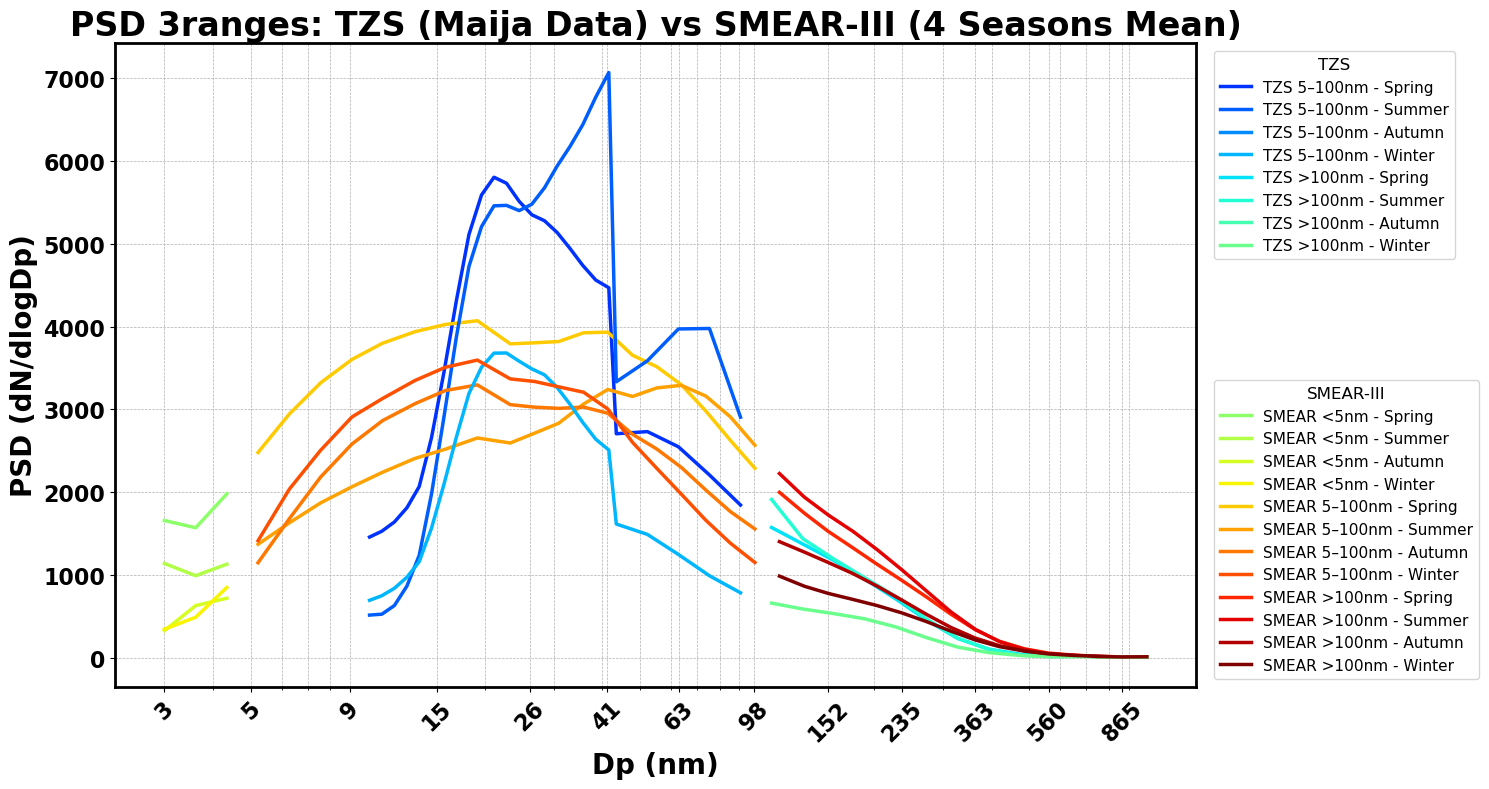

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import to_hex

# Load Excel file
file_path = '/Users/touqeergill/Desktop/SMEAER + TZS (PSD) ORG (Maija Data).xlsx'
combined_data = pd.read_excel(file_path, sheet_name=None)

# Separate data
tzs_data = combined_data['TZS']
smear_data = combined_data['SMEAR']

# Define seasons
seasons = {
    'Spring': (3, 4, 5),
    'Summer': (6, 7, 8),
    'Autumn': (9, 10, 11),
    'Winter': (12, 1, 2)
}

# Function to process and group seasonal PSD values using mean
def seasonal_grouped_psd(df):
    df = df.fillna(0)
    df['Month'] = pd.to_datetime(df.iloc[:, 0]).dt.month
    diameters_m = np.array([float(col) for col in df.columns[1:-1]])  # Exclude datetime and 'Month'
    diameters_nm = diameters_m * 1e9
    grouped_seasonal_results = {}

    for season, months in seasons.items():
        season_df = df[df['Month'].isin(months)].iloc[:, 1:-1]
        psd_matrix = season_df.values
        grouped_seasonal_results[season] = psd_matrix

    return diameters_nm, grouped_seasonal_results

# Process both datasets
diam_tzs, seasonal_tzs = seasonal_grouped_psd(tzs_data)
diam_smear, seasonal_smear = seasonal_grouped_psd(smear_data)

# Generate 24 unique Jet colors
cmap_jet = cm.get_cmap('jet', 24)
jet_colors_24 = [to_hex(cmap_jet(i)) for i in range(24)]

# Define ranges and order
size_ranges = ['<5nm', '5–100nm', '>100nm']
seasons_order = list(seasons.keys())

# Plot setup
plt.figure(figsize=(15, 8))
tzs_handles = []
smear_handles = []
line_count = 0

# Plot logic
for i, size_range in enumerate(size_ranges):
    for j, season in enumerate(seasons_order):
        color_tzs = jet_colors_24[line_count]
        color_smear = jet_colors_24[line_count + 12]

        # Select indices separately for TZS and SMEAR
        if size_range == '<5nm':
            idx_tzs = np.where(diam_tzs < 5)[0]
            idx_smear = np.where(diam_smear < 5)[0]
        elif size_range == '5–100nm':
            idx_tzs = np.where((diam_tzs >= 5) & (diam_tzs <= 100))[0]
            idx_smear = np.where((diam_smear >= 5) & (diam_smear <= 100))[0]
        else:  # '>100nm'
            idx_tzs = np.where(diam_tzs > 100)[0]
            idx_smear = np.where(diam_smear > 100)[0]

        # Plot only if data exists
        if len(idx_tzs) > 0:
            tzs_line, = plt.plot(diam_tzs[idx_tzs],
                                 seasonal_tzs[season][:, idx_tzs].mean(axis=0),  # changed from sum to mean
                                 label=f'TZS {size_range} - {season}',
                                 color=color_tzs, linewidth=2.5)
            tzs_handles.append(tzs_line)

        if len(idx_smear) > 0:
            smear_line, = plt.plot(diam_smear[idx_smear],
                                   seasonal_smear[season][:, idx_smear].mean(axis=0),  # changed from sum to mean
                                   label=f'SMEAR {size_range} - {season}',
                                   color=color_smear, linewidth=2.5)
            smear_handles.append(smear_line)

        line_count += 1

# Custom X-ticks like your image
custom_xticks = [3, 5, 9, 15, 26, 41, 63, 98, 152, 235, 363, 560, 865]
plt.xscale('log')
plt.xticks(custom_xticks, [str(x) for x in custom_xticks], fontsize=16, fontweight='bold', rotation=45)

# Labels and title
plt.xlabel('Dp (nm)', fontsize=20, weight='bold')
plt.ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
plt.title('PSD 3ranges: TZS (Maija Data) vs SMEAR-III (4 Seasons Mean)', fontsize=24, weight='bold')

# Y-ticks and offsets
plt.yticks(fontsize=16, fontweight='bold')
plt.gca().yaxis.get_offset_text().set_fontsize(16)
plt.gca().yaxis.get_offset_text().set_weight('bold')

# Thicker border
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legends
legend1 = plt.legend(handles=tzs_handles, title='TZS', fontsize=11, title_fontsize=12,
                     loc='upper left', bbox_to_anchor=(1.01, 1))
legend2 = plt.legend(handles=smear_handles, title='SMEAR-III', fontsize=11, title_fontsize=12,
                     loc='lower left', bbox_to_anchor=(1.01, 0))
plt.gca().add_artist(legend1)

# Removed fixed Y-axis limits — now autoscaling
# plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

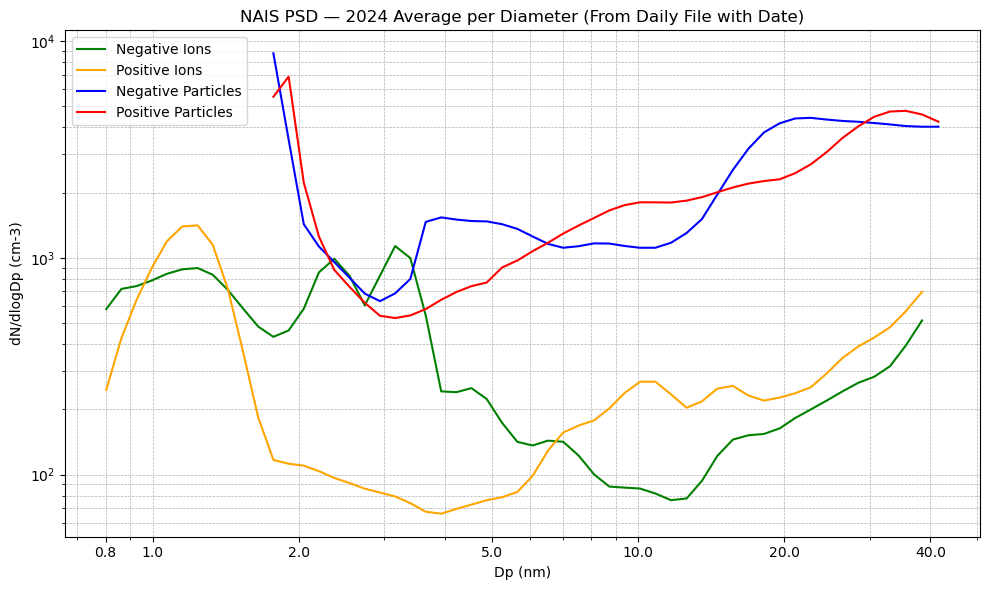

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Load the Excel file containing daily data with dates
file_path = "/Users/touqeergill/Desktop/NAIS TZS 2024.xlsx"  
df = pd.read_excel(file_path)

# Compute the mean across all dates for each diameter bin
mean_df = df.groupby("diameter_nm")[["neg_ions", "pos_ions", "neg_particles", "pos_particles"]].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_df["diameter_nm"], mean_df["neg_ions"], label="Negative Ions", color="green")
plt.plot(mean_df["diameter_nm"], mean_df["pos_ions"], label="Positive Ions", color="orange")
plt.plot(mean_df["diameter_nm"], mean_df["neg_particles"], label="Negative Particles", color="blue")
plt.plot(mean_df["diameter_nm"], mean_df["pos_particles"], label="Positive Particles", color="red")

plt.xscale("log")
plt.yscale("log")

# Set readable x-axis ticks
ticks = [0.8, 1, 2, 5, 10, 20, 40]
plt.xticks(ticks)
plt.gca().get_xaxis().set_major_formatter(ScalarFormatter())
plt.gca().tick_params(axis='x', which='major', labelsize=10)

plt.xlabel("Dp (nm)")
plt.ylabel("dN/dlogDp (cm-3)")
plt.title("NAIS PSD — 2024 Average per Diameter (From Daily File with Date)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

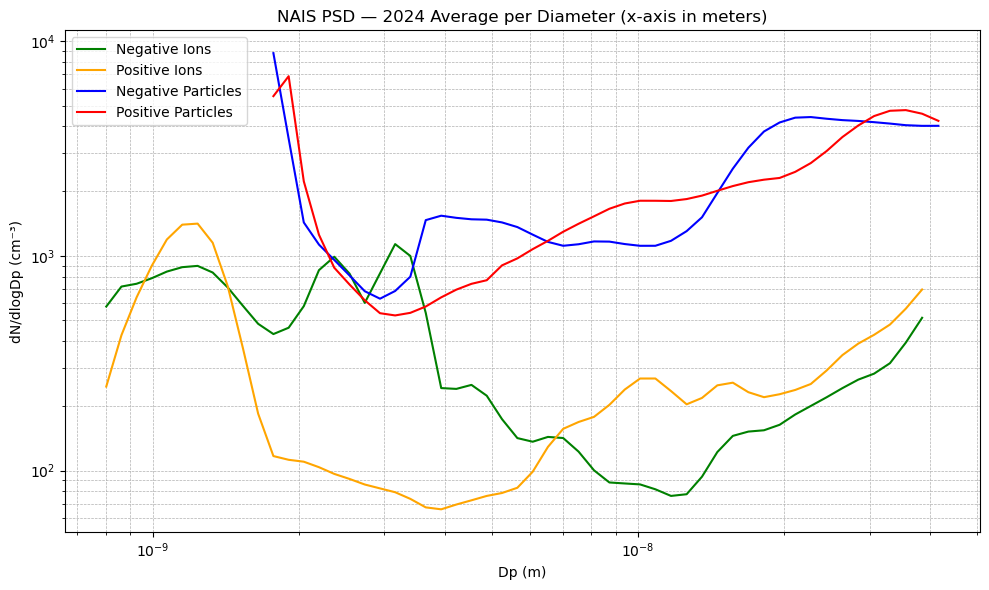

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

# Load the Excel file
file_path = "/Users/touqeergill/Desktop/NAIS TZS 2024.xlsx"  
df = pd.read_excel(file_path)

# Compute the mean across all dates for each diameter bin
mean_df = df.groupby("diameter_nm")[["neg_ions", "pos_ions", "neg_particles", "pos_particles"]].mean().reset_index()

# Convert diameter from nanometers to meters
mean_df["diameter_m"] = mean_df["diameter_nm"] * 1e-9

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_df["diameter_m"], mean_df["neg_ions"], label="Negative Ions", color="green")
plt.plot(mean_df["diameter_m"], mean_df["pos_ions"], label="Positive Ions", color="orange")
plt.plot(mean_df["diameter_m"], mean_df["neg_particles"], label="Negative Particles", color="blue")
plt.plot(mean_df["diameter_m"], mean_df["pos_particles"], label="Positive Particles", color="red")

# Set log scale for both axes
plt.xscale("log")
plt.yscale("log")

# Use scientific notation on x-axis
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().xaxis.set_major_formatter(LogFormatterSciNotation())
plt.gca().tick_params(axis='x', which='major', labelsize=10)

# Labels and styling
plt.xlabel("Dp (m)")  # x-axis in meters
plt.ylabel("dN/dlogDp (cm⁻³)")
plt.title("NAIS PSD — 2024 Average per Diameter (x-axis in meters)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

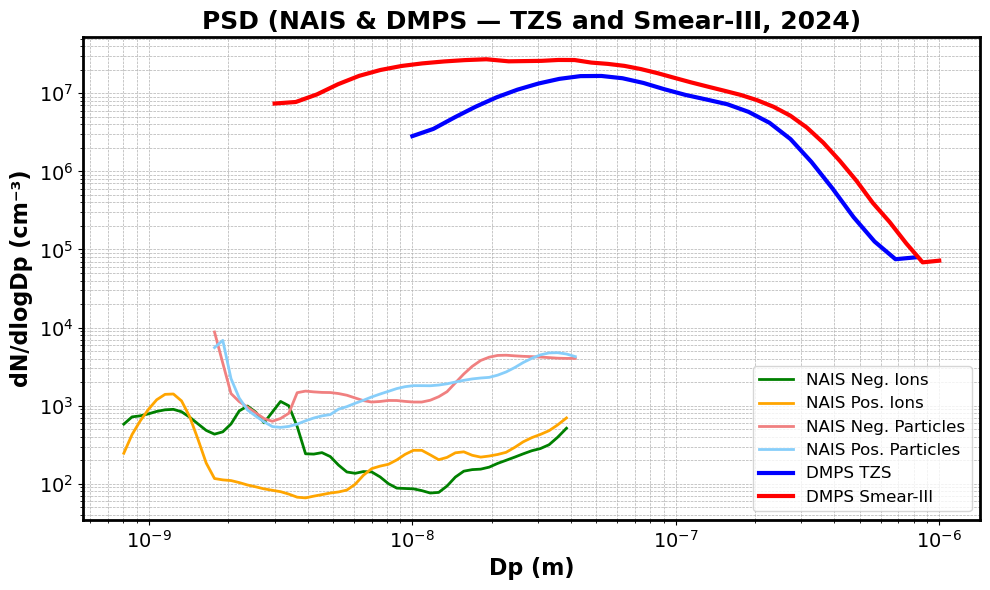

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

# --- Load Excel file containing all data ---
file_path = '/Users/touqeergill/Desktop/TZS + SMEAR + NAIS TZS 2024.xlsx'
tzs_data = pd.read_excel(file_path, sheet_name='TZS')
smear_data = pd.read_excel(file_path, sheet_name='SMEAR')
nais_df = pd.read_excel(file_path, sheet_name='NAIS TZS')

# --- Process NAIS Data (long format) ---
nais_mean_df = nais_df.groupby("diameter_nm")[["neg_ions", "pos_ions", "neg_particles", "pos_particles"]].mean().reset_index()
nais_mean_df["diameter_m"] = nais_mean_df["diameter_nm"] * 1e-9  # Convert from nm to meters

# --- Process TZS Data (wide format, diameters already in meters) ---
tzs_diameters = []
tzs_valid_columns = []
for col in tzs_data.columns[1:]:
    try:
        diameter = float(col)
        tzs_diameters.append(diameter)
        tzs_valid_columns.append(col)
    except ValueError:
        continue
tzs_sum_psd = tzs_data[tzs_valid_columns].sum()

# --- Process SMEAR Data (wide format, diameters already in meters) ---
smear_diameters = [float(d) for d in smear_data.columns[1:]]
smear_sum_psd = smear_data.iloc[:, 1:].sum()

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plot NAIS Data
plt.plot(nais_mean_df["diameter_m"], nais_mean_df["neg_ions"], label="NAIS Neg. Ions", color="green", linewidth=2)
plt.plot(nais_mean_df["diameter_m"], nais_mean_df["pos_ions"], label="NAIS Pos. Ions", color="orange", linewidth=2)
plt.plot(nais_mean_df["diameter_m"], nais_mean_df["neg_particles"], label="NAIS Neg. Particles", color="lightcoral", linewidth=2)
plt.plot(nais_mean_df["diameter_m"], nais_mean_df["pos_particles"], label="NAIS Pos. Particles", color="lightskyblue", linewidth=2)

# Plot DMPS Data
plt.plot(tzs_diameters, tzs_sum_psd, linewidth=3, color='blue', label="DMPS TZS")
plt.plot(smear_diameters, smear_sum_psd, linewidth=3, color='red', label="DMPS Smear-III")

# --- Axis scaling and formatting ---
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().xaxis.set_major_formatter(LogFormatterSciNotation())

plt.xlabel("Dp (m)", fontsize=16, weight='bold')
plt.ylabel("dN/dlogDp (cm⁻³)", fontsize=16, weight='bold')
plt.title("PSD (NAIS & DMPS — TZS and Smear-III, 2024)", fontsize=18, weight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

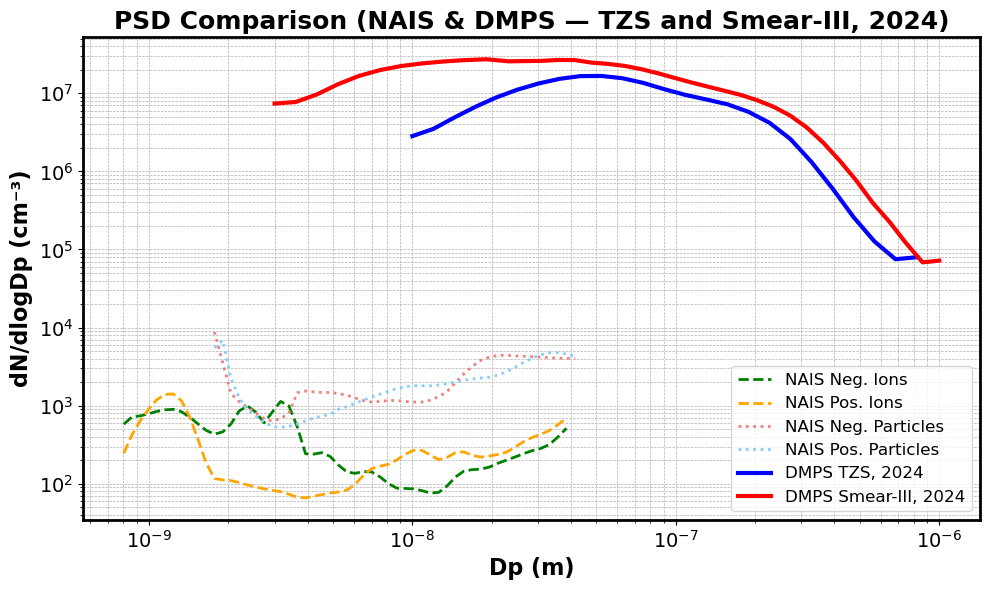

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

# --- Load Excel file containing all data ---
file_path = '/Users/touqeergill/Desktop/TZS + SMEAR + NAIS TZS 2024.xlsx'
tzs_data = pd.read_excel(file_path, sheet_name='TZS')
smear_data = pd.read_excel(file_path, sheet_name='SMEAR')
nais_df = pd.read_excel(file_path, sheet_name='NAIS TZS')

# --- Process NAIS Data (long format) ---
nais_mean_df = nais_df.groupby("diameter_nm")[["neg_ions", "pos_ions", "neg_particles", "pos_particles"]].mean().reset_index()
nais_mean_df["diameter_m"] = nais_mean_df["diameter_nm"] * 1e-9  # Convert from nm to meters

# --- Process TZS Data (wide format, diameters already in meters) ---
tzs_diameters = []
tzs_valid_columns = []
for col in tzs_data.columns[1:]:
    try:
        diameter = float(col)
        tzs_diameters.append(diameter)
        tzs_valid_columns.append(col)
    except ValueError:
        continue
tzs_sum_psd = tzs_data[tzs_valid_columns].sum()

# --- Process SMEAR Data (wide format, diameters already in meters) ---
smear_diameters = [float(d) for d in smear_data.columns[1:]]
smear_sum_psd = smear_data.iloc[:, 1:].sum()

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plot NAIS Data with dashed/dotted lines
plt.plot(nais_mean_df["diameter_m"], nais_mean_df["neg_ions"], label="NAIS Neg. Ions", color="green", linewidth=2, linestyle='--')
plt.plot(nais_mean_df["diameter_m"], nais_mean_df["pos_ions"], label="NAIS Pos. Ions", color="orange", linewidth=2, linestyle='--')
plt.plot(nais_mean_df["diameter_m"], nais_mean_df["neg_particles"], label="NAIS Neg. Particles", color="lightcoral", linewidth=2, linestyle=':')
plt.plot(nais_mean_df["diameter_m"], nais_mean_df["pos_particles"], label="NAIS Pos. Particles", color="lightskyblue", linewidth=2, linestyle=':')

# Plot DMPS Data with solid lines
plt.plot(tzs_diameters, tzs_sum_psd, linewidth=3, color='blue', label="DMPS TZS, 2024")
plt.plot(smear_diameters, smear_sum_psd, linewidth=3, color='red', label="DMPS Smear-III, 2024")

# --- Axis scaling and formatting ---
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().xaxis.set_major_formatter(LogFormatterSciNotation())

plt.xlabel("Dp (m)", fontsize=16, weight='bold')
plt.ylabel("dN/dlogDp (cm⁻³)", fontsize=16, weight='bold')
plt.title("PSD Comparison (NAIS & DMPS — TZS and Smear-III, 2024)", fontsize=18, weight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

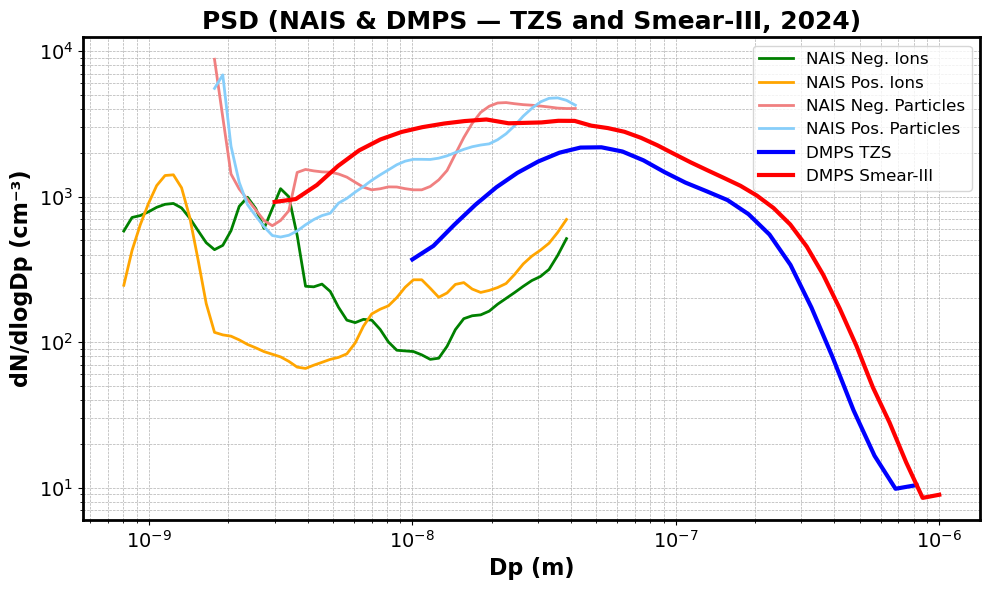

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation

# --- Load Excel file containing all data ---
file_path = '/Users/touqeergill/Desktop/TZS + SMEAR + NAIS TZS 2024.xlsx'
tzs_data = pd.read_excel(file_path, sheet_name='TZS')
smear_data = pd.read_excel(file_path, sheet_name='SMEAR')
nais_df = pd.read_excel(file_path, sheet_name='NAIS TZS')

# --- Process NAIS Data (long format) ---
nais_mean_df = nais_df.groupby("diameter_nm")[["neg_ions", "pos_ions", "neg_particles", "pos_particles"]].mean().reset_index()
nais_mean_df["diameter_m"] = nais_mean_df["diameter_nm"] * 1e-9  # Convert from nm to meters

# --- Process TZS Data (wide format, diameters already in meters) ---
tzs_diameters = []
tzs_valid_columns = []
for col in tzs_data.columns[1:]:
    try:
        diameter = float(col)
        tzs_diameters.append(diameter)
        tzs_valid_columns.append(col)
    except ValueError:
        continue
tzs_sum_psd = tzs_data[tzs_valid_columns].mean()

# --- Process SMEAR Data (wide format, diameters already in meters) ---
smear_diameters = [float(d) for d in smear_data.columns[1:]]
smear_sum_psd = smear_data.iloc[:, 1:].mean()

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plot NAIS Data
plt.plot(nais_mean_df["diameter_m"], nais_mean_df["neg_ions"], label="NAIS Neg. Ions", color="green", linewidth=2)
plt.plot(nais_mean_df["diameter_m"], nais_mean_df["pos_ions"], label="NAIS Pos. Ions", color="orange", linewidth=2)
plt.plot(nais_mean_df["diameter_m"], nais_mean_df["neg_particles"], label="NAIS Neg. Particles", color="lightcoral", linewidth=2)
plt.plot(nais_mean_df["diameter_m"], nais_mean_df["pos_particles"], label="NAIS Pos. Particles", color="lightskyblue", linewidth=2)

# Plot DMPS Data
plt.plot(tzs_diameters, tzs_sum_psd, linewidth=3, color='blue', label="DMPS TZS")
plt.plot(smear_diameters, smear_sum_psd, linewidth=3, color='red', label="DMPS Smear-III")

# --- Axis scaling and formatting ---
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().xaxis.set_major_formatter(LogFormatterSciNotation())

plt.xlabel("Dp (m)", fontsize=16, weight='bold')
plt.ylabel("dN/dlogDp (cm⁻³)", fontsize=16, weight='bold')
plt.title("PSD (NAIS & DMPS — TZS and Smear-III, 2024)", fontsize=18, weight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()